In [1]:
import os
print(os.getcwd())


/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


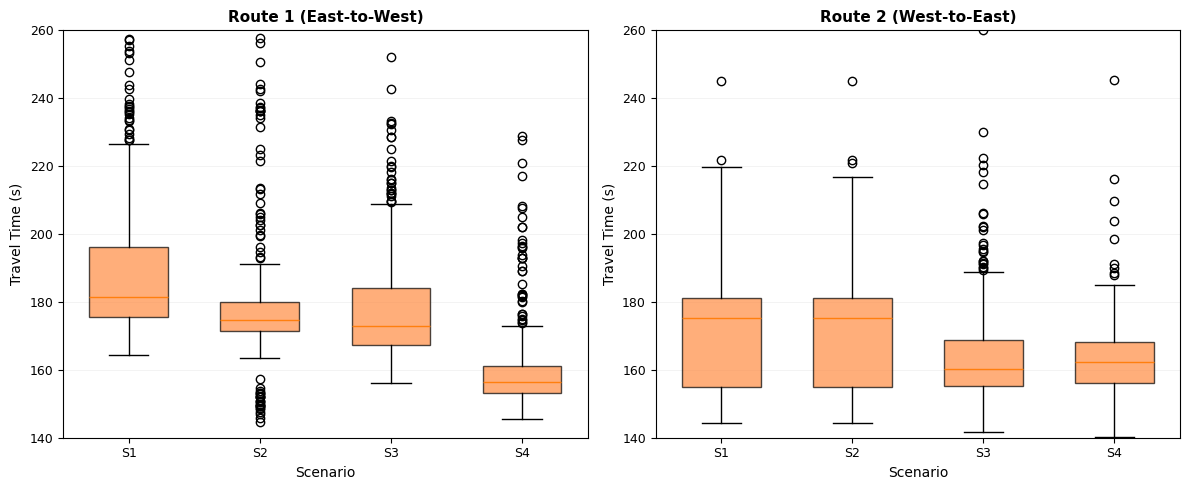

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# Define scenarios
# NOTE: UPDATE THESE FILE PATHS before running!
# Replace '/Users/viktorsuter/Desktop/Scenarios/' with your own directory path
scenarios = {
    1: '/content/drive/My Drive/CAS_M2/Scenarios/S000001/S000001_all_runs.csv',
    2: '/content/drive/My Drive/CAS_M2/Scenarios/S000002/S000002_all_runs.csv',
    3: '/content/drive/My Drive/CAS_M2/Scenarios/S000003/S000003_all_runs.csv',
    4: '/content/drive/My Drive/CAS_M2/Scenarios/S000004/S000004_all_runs.csv'
}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

# Collect data for box plots
bus_data = {route: {scenario: [] for scenario in scenarios.keys()} for route in routes}

for scenario_num, file_path in scenarios.items():
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only buses
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    buses_df = routes_df[routes_df['FzTyp'] == 300]

    for route in routes:
        # Filter data for this route
        data = buses_df[buses_df['Nr.'] == route]['Rsz.'].values
        bus_data[route][scenario_num] = data

# Create box plots (1 row, 2 columns - one for each route)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for col, route in enumerate(routes):
    # Prepare data for box plot
    data_to_plot = [bus_data[route][scenario] for scenario in scenarios.keys()]

    # Create box plot
    bp = axes[col].boxplot(data_to_plot, tick_labels=[f'S{i}' for i in scenarios.keys()],
                           patch_artist=True, widths=0.6)

    # Color the boxes orange
    for patch in bp['boxes']:
        patch.set_facecolor('#FF8C42')
        patch.set_alpha(0.7)

    axes[col].set_title(f'Route {route} ({route_descriptions[route]})', fontsize=11, fontweight='bold')
    axes[col].set_xlabel('Scenario', fontsize=10)
    axes[col].set_ylabel('Travel Time (s)', fontsize=10)
    axes[col].tick_params(labelsize=9)
    axes[col].grid(True, alpha=0.2, linewidth=0.5, axis='y')
    axes[col].set_ylim(140, 260)

plt.tight_layout()

# Save the figure (UPDATE the output path to your desired location)
plt.savefig('/content/drive/My Drive/CAS_M2/bus_travel_time_boxplots.png', dpi=300, bbox_inches='tight')

plt.show()

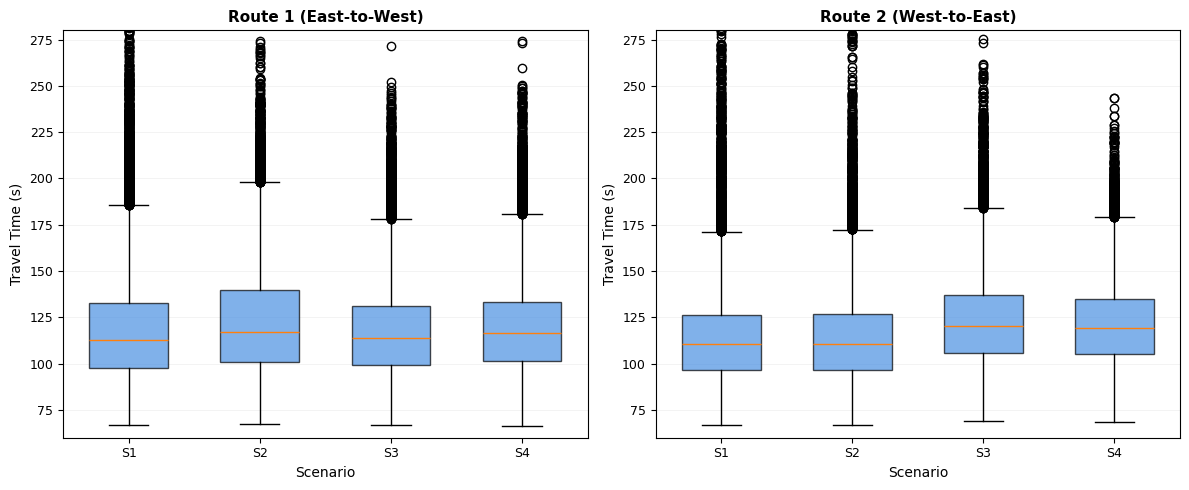

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define scenarios
# NOTE: UPDATE THESE FILE PATHS before running!
# Replace '/Users/viktorsuter/Desktop/Scenarios/' with your own directory path
#scenarios = {
   # 1: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv',
    #2: '/Users/viktorsuter/Desktop/Scenarios/S000002/S000002_all_runs.csv',
    #3: '/Users/viktorsuter/Desktop/Scenarios/S000003/S000003_all_runs.csv',
    #4: '/Users/viktorsuter/Desktop/Scenarios/S000004/S000004_all_runs.csv'
#}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

# Collect data for box plots
vehicle_data = {route: {scenario: [] for scenario in scenarios.keys()} for route in routes}

for scenario_num, file_path in scenarios.items():
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only non-buses (FzTyp != 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    other_vehicles_df = routes_df[routes_df['FzTyp'] != 300]

    for route in routes:
        # Filter data for this route
        data = other_vehicles_df[other_vehicles_df['Nr.'] == route]['Rsz.'].values
        vehicle_data[route][scenario_num] = data

# Create box plots (1 row, 2 columns - one for each route)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for col, route in enumerate(routes):
    # Prepare data for box plot
    data_to_plot = [vehicle_data[route][scenario] for scenario in scenarios.keys()]

    # Create box plot
    bp = axes[col].boxplot(data_to_plot, tick_labels=[f'S{i}' for i in scenarios.keys()],
                           patch_artist=True, widths=0.6)

    # Color the boxes blue
    for patch in bp['boxes']:
        patch.set_facecolor('#4A90E2')
        patch.set_alpha(0.7)

    axes[col].set_title(f'Route {route} ({route_descriptions[route]})', fontsize=11, fontweight='bold')
    axes[col].set_xlabel('Scenario', fontsize=10)
    axes[col].set_ylabel('Travel Time (s)', fontsize=10)
    axes[col].tick_params(labelsize=9)
    axes[col].grid(True, alpha=0.2, linewidth=0.5, axis='y')
    axes[col].set_ylim(60, 280)

plt.tight_layout()

# Save the figure (UPDATE the output path to your desired location)
#plt.savefig('/Users/viktorsuter/Desktop/other_vehicles_travel_time_boxplots.png', dpi=300, bbox_inches='tight')

plt.show()

In [28]:
# Define scenarios (assuming this dictionary is already defined in a previous cell)
scenarios = {
    1: '/content/drive/My Drive/CAS_M2/Scenarios/S000001/S000001_all_runs.csv',
    2: '/content/drive/My Drive/CAS_M2/Scenarios/S000002/S000002_all_runs.csv',
    3: '/content/drive/My Drive/CAS_M2/Scenarios/S000003/S000003_all_runs.csv',
    4: '/content/drive/My Drive/CAS_M2/Scenarios/S000004/S000004_all_runs.csv'
}

all_scenarios_df = pd.DataFrame()

for scenario_num, file_path in scenarios.items():
    # Read the CSV file
    df_scenario = pd.read_csv(file_path)

    # Select the desired columns
    df_scenario = df_scenario[['simrun', 'Nr.', 'FzTyp', 'Rsz.']].copy()

    # Add a scenario number column for identification
    df_scenario['Scenario'] = scenario_num

    # Concatenate with the main DataFrame
    all_scenarios_df = pd.concat([all_scenarios_df, df_scenario], ignore_index=True)

# Filter for only buses if needed (based on your previous commented code)
# all_scenarios_df = all_scenarios_df[all_scenarios_df['FzTyp'] == 300].copy()

# Calculate the average Rsz. for each simrun, route, and scenario
df_avg_all_scenarios = all_scenarios_df.groupby(['Scenario', 'simrun', 'Nr.'])['Rsz.'].mean().reset_index()

# Display the resulting DataFrame
#display(df_avg_all_scenarios)

In [29]:
df_cumulative_avg_all_scenarios = df_avg_all_scenarios.copy()
df_cumulative_avg_all_scenarios['cumulative_avg_Rsz'] = df_cumulative_avg_all_scenarios.groupby(['Scenario', 'Nr.'])['Rsz.'].expanding().mean().reset_index(level=['Scenario', 'Nr.'], drop=True)

# Optional: Display the new DataFrame
display(df_cumulative_avg_all_scenarios)

,Scenario,simrun,Nr.,Rsz.,cumulative_avg_Rsz
0,1,1,1,106.375062,106.375062
1,1,1,2,113.220665,113.220665
2,1,1,3,97.454369,97.454369
3,1,1,4,97.507104,97.507104
4,1,2,1,109.224444,107.799753
...,...,...,...,...,...
795,4,49,4,99.326667,107.560790
796,4,50,1,116.278856,120.708416
797,4,50,2,118.833005,121.951617
798,4,50,3,84.492308,109.576788


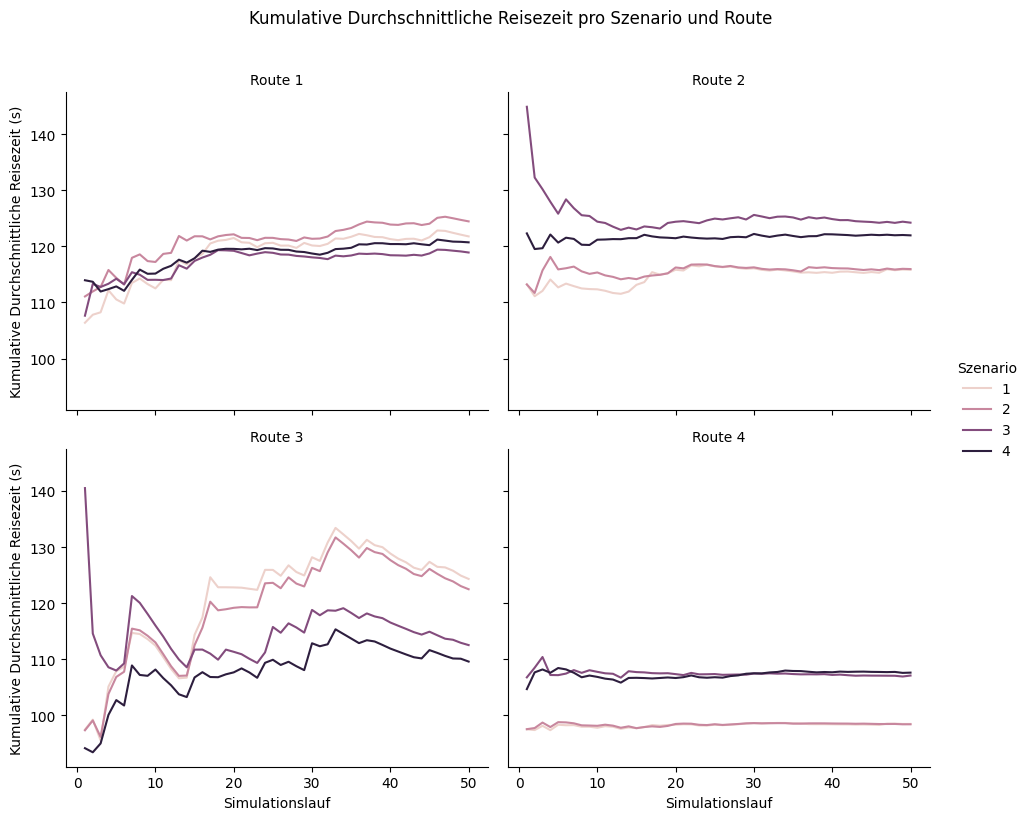

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid for each route
g = sns.FacetGrid(df_cumulative_avg_all_scenarios, col='Nr.', col_wrap=2, height=4, aspect=1.2)

# Map the line plot onto the FacetGrid
g.map(sns.lineplot, 'simrun', 'cumulative_avg_Rsz', 'Scenario')

# Add titles and labels
g.fig.suptitle('Kumulative Durchschnittliche Reisezeit pro Szenario und Route', y=1.02)
g.set_axis_labels('Simulationslauf', 'Kumulative Durchschnittliche Reisezeit (s)')
g.add_legend(title='Szenario')
g.set_titles("Route {col_name}")
g.tight_layout()

plt.show()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the combined plot with color by Route and line style by Scenario
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_cumulative_avg_all_scenarios, x='simrun', y='normalized_cumulative_avg_Rsz',
             hue='Nr.', style='Scenario', palette='flare') # Using viridis colormap for different routes

plt.title('Normalisierte Kumulative Durchschnittliche Reisezeit pro Route und Szenario (Basis: Simrun 50 = 100%)')
plt.xlabel('Simulationslauf')
plt.ylabel('Normalisierte Kumulative Durchschnittliche Reisezeit (%)')
plt.grid(True, alpha=0.3)
plt.legend(title='Legende', bbox_to_anchor=(1.05, 1), loc='upper left') # Update legend title
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `normalized_cumulative_avg_Rsz` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

In [32]:
# Calculate the value of cumulative_avg_Rsz at simrun=50 for each scenario and route
avg_at_simrun50 = df_cumulative_avg_all_scenarios[df_cumulative_avg_all_scenarios['simrun'] == 50].set_index(['Scenario', 'Nr.'])['cumulative_avg_Rsz']

# Normalize the cumulative average travel time for each scenario and route
df_cumulative_avg_all_scenarios['normalized_cumulative_avg_Rsz'] = df_cumulative_avg_all_scenarios.apply(
    lambda row: (row['cumulative_avg_Rsz'] / avg_at_simrun50[(row['Scenario'], row['Nr.'])]) * 100, axis=1
)

# Optional: Display the new DataFrame with normalized values
display(df_cumulative_avg_all_scenarios)

,Scenario,simrun,Nr.,Rsz.,cumulative_avg_Rsz,normalized_cumulative_avg_Rsz
0,1,1,1,106.375062,106.375062,87.359310
1,1,1,2,113.220665,113.220665,97.754310
2,1,1,3,97.454369,97.454369,78.397222
3,1,1,4,97.507104,97.507104,99.034049
4,1,2,1,109.224444,107.799753,88.529322
...,...,...,...,...,...,...
795,4,49,4,99.326667,107.560790,99.957808
796,4,50,1,116.278856,120.708416,100.000000
797,4,50,2,118.833005,121.951617,100.000000
798,4,50,3,84.492308,109.576788,100.000000


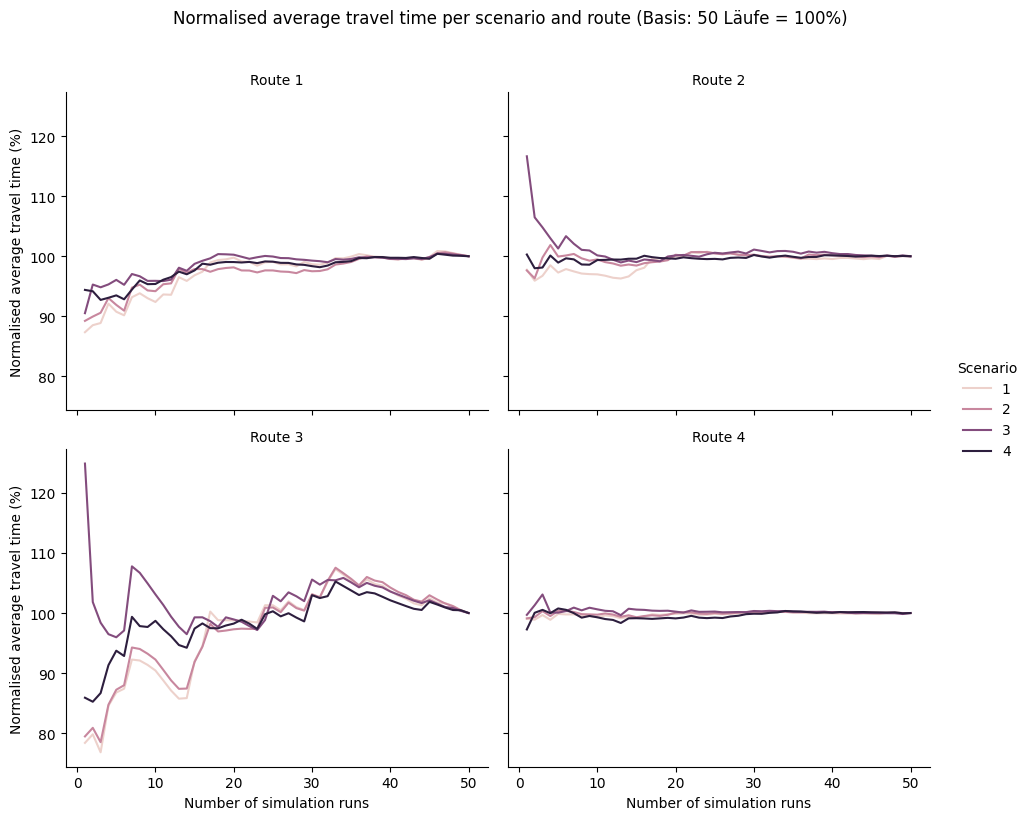

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid for each route to display normalized values per scenario
g = sns.FacetGrid(df_cumulative_avg_all_scenarios, col='Nr.', col_wrap=2, height=4, aspect=1.2)

# Map the line plot onto the FacetGrid, using Scenario as hue
g.map(sns.lineplot, 'simrun', 'normalized_cumulative_avg_Rsz', 'Scenario')

# Add titles and labels
g.fig.suptitle('Normalised average travel time per scenario and route (Basis: 50 Läufe = 100%)', y=1.02)
g.set_axis_labels('Number of simulation runs', 'Normalised average travel time (%)')
g.add_legend(title='Scenario')
g.set_titles("Route {col_name}")
g.tight_layout()
plt.savefig("NormAvgTT.jpeg", format='jpeg', dpi=300)
plt.show()

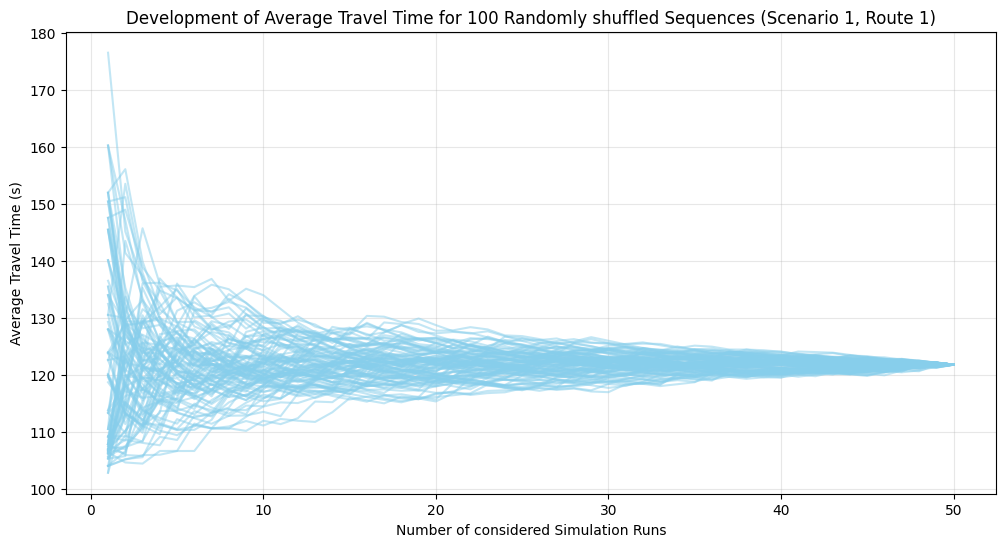

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract data for Scenario 1 and Route 1
df_cum_avg_S1R1 = df_cumulative_avg_all_scenarios[(df_cumulative_avg_all_scenarios['Scenario'] == 1) & (df_cumulative_avg_all_scenarios['Nr.'] == 1)].copy()

# Generate 100 random sequences and calculate cumulative averages
num_simulations = 100
cumulative_averages = {}

for i in range(num_simulations):
    # Shuffle the DataFrame to get a random sequence of simruns
    shuffled_df = df_cum_avg_S1R1.sample(frac=1, random_state=i).reset_index(drop=True)

    # Calculate the cumulative average Rsz for the shuffled data
    shuffled_df[f'cumulative_avg_Rsz_{i+1}'] = shuffled_df['Rsz.'].expanding().mean()

    # Store the cumulative average column
    cumulative_averages[f'cumulative_avg_Rsz_{i+1}'] = shuffled_df[f'cumulative_avg_Rsz_{i+1}']

# Combine all cumulative averages into a single DataFrame for plotting
cumulative_avg_df = pd.DataFrame(cumulative_averages)

# Add the simrun index back for plotting
cumulative_avg_df['simrun'] = np.arange(1, len(cumulative_avg_df) + 1)

# Plot all cumulative average lines
plt.figure(figsize=(12, 6))

for col in cumulative_avg_df.columns:
    if col != 'simrun':
        plt.plot(cumulative_avg_df['simrun'], cumulative_avg_df[col], color='skyblue', alpha=0.5)

# Plot the original cumulative average line (optional, for comparison)
#plt.plot(df_cum_avg_S1R1['simrun'], df_cum_avg_S1R1['cumulative_avg_Rsz'], color='red', linewidth=2, label='Original Cumulative Average')

plt.title('Development of Average Travel Time for 100 Randomly shuffled Sequences (Scenario 1, Route 1)')
plt.xlabel('Number of considered Simulation Runs')
plt.ylabel('Average Travel Time (s)')
plt.grid(True, alpha=0.3)
plt.savefig("MeanConvergence.jpeg", format='jpeg', dpi=300)
plt.show()